# <center style='color:olive'> Mutual Information (`MI`), Adjusted Mutual Information (`AMI`) and Normalized Mutual Information (`NMI`) - Example using `wine` dataset </center>

## 1. Import required libraries

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load sklearn's `wine` dataset 

In [2]:
wine = datasets.load_wine()
data = wine.data
targets = wine.target

In [3]:
data.shape # 178 samples and 13 features

(178, 13)

In [4]:
wine.feature_names # the names of 13 features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names # the names of targets

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

So, there are three different targets.

## 3. Create a dataframe

In [6]:
df = pd.DataFrame(data, columns=wine.feature_names)
df['target_names'] = targets # add targets to the dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.target_names.value_counts()

1    71
0    59
2    48
Name: target_names, dtype: int64

So, `class_0`, `class_1` and `class_2` are present 59, 71 and 48 times, respectively in the __wine__ dataset.

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 4. Drop some features

In [9]:
new_df = df.drop(['magnesium', 'proline', 'target_names'], axis=1)
new_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines
0,14.23,1.71,2.43,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93


In [10]:
new_df.shape

(178, 11)

2 `features ('magnesium', 'proline')` along with the `target_names` column have been dropped from `df`.

## 5. Perform preprocessing

In [11]:
scaler = StandardScaler()
scaled = scaler.fit_transform(new_df)

## 6. Scaled dataframe

In [12]:
df_scaled = pd.DataFrame(scaled, columns=new_df.columns)
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines
0,1.518613,-0.562250,0.232053,-1.169593,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920
1,0.246290,-0.499413,-0.827996,-2.490847,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449
2,0.196879,0.021231,1.109334,-0.268738,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587
3,1.691550,-0.346811,0.487926,-0.809251,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071
4,0.295700,0.227694,1.840403,0.451946,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601


In [13]:
df_scaled.shape # same shape as `new_df`

(178, 11)

## 7. Perform K-Means clustering considering 3 clusters

In [14]:
kmeans = KMeans(n_clusters=3, random_state=33, n_init='auto')
kmeans.fit(df_scaled)
preds = kmeans.labels_

## 8. Add two new columns to the scaled dataframe

In [15]:
df_scaled['ground_truth'] = targets
df_scaled['prediction'] = preds
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,ground_truth,prediction
0,1.518613,-0.562250,0.232053,-1.169593,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,0,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0,0
2,0.196879,0.021231,1.109334,-0.268738,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,0,0
3,1.691550,-0.346811,0.487926,-0.809251,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,0,0
4,0.295700,0.227694,1.840403,0.451946,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,0,0


In [16]:
print(df_scaled.ground_truth.unique())
print(df_scaled.prediction.unique())

[0 1 2]
[0 1 2]


## 9. Clustering comparison between ground truths and predictions

In [17]:
cm = metrics.confusion_matrix(targets, preds)

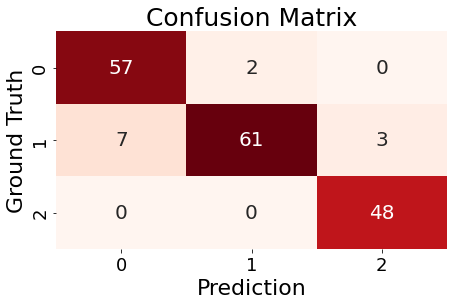

In [18]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', cbar=False, annot_kws={'size': 20}, cmap='Reds')

plt.xlabel('Prediction', fontsize=22)
plt.ylabel('Ground Truth', fontsize=22)
plt.title('Confusion Matrix', fontsize=25)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## 10. Calculate `Mutual Information (MI)`

In [19]:
print('Mutual Information (MI):', round(metrics.mutual_info_score(targets, preds), 5))

Mutual Information (MI): 0.848


## 11. Calculate `Adjusted Mutual Information (AMI)`

In [20]:
print('Adjusted Mutual Information (AMI):', round(metrics.adjusted_mutual_info_score(targets, preds), 5))

Adjusted Mutual Information (AMI): 0.77579


## 12. Calculate `Normalized Mutual Information (NMI)`

In [21]:
print('Normalized Mutual Information (NMI):', round(metrics.normalized_mutual_info_score(targets, preds), 5))

Normalized Mutual Information (NMI): 0.77814


### Higher scores are desired for `MI`, `AMI` and `NMI`.